In [4]:
import pandas
import geopandas
from shapely.geometry import Point
import numpy
import re
import holoviews
%load_ext line_profiler 
%load_ext Cython
#package para análise de código

In [5]:
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
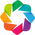

In [6]:
holoviews.notebook_extension('bokeh')

Eu utilizei somente os datasets que possuem dados de latitude e longitude inicialmente mas a ideia
é adicionar informações de bairro.

# Data Sources

As fontes de dados são do site dados.recife.pe.gov.br. Todas são relacionadas à CTTU

In [14]:
acidentes_2014 = pandas.read_csv("data/acidentes-2014.csv", sep=";")
acidentes_2015 = pandas.read_csv("data/acidentes-2015.csv", sep=";")
acidentes_2016 = pandas.read_csv("data/acidentes-2016.csv", sep=";")

In [15]:
equipamentos_monitoramento = pandas.read_csv("data/equipamentos-de-monitoramento-e-ficalizacao.csv", sep=";")

In [16]:
semaforos = pandas.read_csv("data/semaforos.csv", sep=";")

In [17]:
fiscalizacao = pandas.read_csv("data/fiscalizacao-eletronica.csv", sep=";")

In [18]:
monitoramento = pandas.read_csv("data/monitoramentocttu.csv", sep=";")

In [19]:
infracoes_2014 = pandas.read_csv("data/infracoes/relatorio-de-multas-implantadas-em-2014.csv", sep=";")
infracoes_2015 = pandas.read_csv("data/infracoes/relatorio-de-multas-implantadas-em-2015.csv", sep=";")
infracoes_2016 = pandas.read_csv("data/infracoes/relatorio-de-multas-implantadas-em-2016.csv", sep=";")


## Discussão
Um desafio significante do projeto foi juntar os dataframes a partir dos lat e longs, como juntar exemplos, 
como calcular a distância ótima para que acidentes não fossem inseridos próximos de dois semafóros, por exempo?



# Exploração - Acidentes

In [20]:
acidentes_2015.head(10)

,data_abertura,hora_abertura,bairro,endereco,complemento,tipo_ocorrencia,quantidade_vitimas,descricao,tipo,latitude,longitude
0,03/08/2015,18:58,MADALENA,RUA JOSE OSORIO,AO LADO DA SENA AUTOMOVEIS,COLISÃO,1,COLISÃO ENTRE UM CAMINHÃO E UMA BICICLETA,Ciclista,-8.054056,-34.913226
1,03/08/2015,22:57,CABANGA,AV SUL,E/F AO SEMAFORO 260,COLISÃO COM CICLISTA,1,AUTO - BICICLETA,Ciclista,-8.076539,-34.893656
2,05/08/2015,15:46,AFOGADOS,RUA COSME VIANA 122,EM FRENTE AO POSTO SETTA / PROX AO POSTO DA SE...,COLISÃO,1,AUTO E BICICLETA,Ciclista,-8.071116,-34.909455
3,06/08/2015,07:13,ROSARINHO,RUA HIPOLITO BRAGA 181,POR TRÁS DA PRAÇA DO ROSARINHO EDF ALICE QUEIROS,COLISÃO,1,COLISÃO COM VITIMA ENTRE UM AUTO-PASSEIO E UMA...,Ciclista,-8.031981,-34.896652
4,06/08/2015,16:53,AREIAS,AV TAPAJOS,EM FRENTE AO BODE DO NÓ,COLISÃO,1,COLISÃO MOTO E BICICLETA,Ciclista,-8.093370,-34.923906
5,07/08/2015,20:08,CASA AMARELA,AV NORTE,EM FRENTE AO REI DA PICANHA,COLISÃO COM CICLISTA,1,COLISÃO A CICLISTA,Ciclista,-8.024209,-34.911276
6,30/08/2015,15:27,IPUTINGA,AV CAXANGA,PROXIMO AO ELEVADO,COLISÃO COM CICLISTA,1,,Ciclista,-8.042828,-34.934700
7,03/08/2015,21:23,VASCO DA GAMA,RUA VASCO DA GAMA,ANFR AO SESI DO VASCO DA GAMA,COLISÃO,1,AUTO E CINQUENTINHA,Ciclomotor,-8.019286,-34.921337
8,05/08/2015,08:41,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES 6369,EM FRENTE DA OFICINA MISTERAUTO,COLISÃO,2,COLC/V,Ciclomotor,-8.142000,-34.917753
9,07/08/2015,08:14,MADALENA,RUA BENFICA,SEMAFORO Nº628-EM FRENTE AO EXTRA,COLISÃO,1,COLC/V,Ciclomotor,-8.058101,-34.905466


# Exploração - Infrações

In [21]:
infracoes_2014.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento'],
      dtype='object')

In [22]:
infracoes_2015.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento'],
      dtype='object')

In [23]:
infracoes_2016.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento'],
      dtype='object')

# Exploração - fiscalização

In [24]:
fiscalizacao.head(10)

,NOME,EQUIPAMENTO,CONTRATO,ENDERECO,FLUXO_VEICULO,VELOCIDADE,LONGITUDE,LATITUDE
0,1,DEV,015/2011,AVENIDA ENGº ABDIAS CARVALHO - PROX N 101 - SE...,29000.0,60.0,-34.935969,-8.063842
1,2,DEV,015/2011,AVENIDA ENGº ABDIAS CARVALHO - PROX N 101 - SE...,34000.0,60.0,-34.935493,-8.063640
2,3,DEV,015/2011,AV MAL MASCARENHAS DE MORAES - PROX AEROPORTO ...,64000.0,60.0,-34.915644,-8.130088
3,4,DEV,015/2011,AV MAL MASCARENHAS DE MORAES - PROX AEROPORTO ...,64000.0,60.0,-34.915615,-8.129942
4,5,DEV,015/2011,AV MAL MASCARENHAS DE MORAES - PROX AEROPORTO ...,64000.0,60.0,-34.915856,-8.130059
5,6,DEV,015/2011,AV MAL MASCARENHAS DE MORAES - PROX AEROPORTO ...,64000.0,60.0,-34.915409,-8.129972
6,7,DEV,015/2011,AV BOA VIAGEM - PROX N 102,43000.0,60.0,-34.882100,-8.091903
7,8,DEV,015/2011,TERCEIRO JARDIM/BOA VIAGEM,43000.0,60.0,-34.888333,-8.107912
8,9,DEV,015/2011,LARGO DO CABANGA - SENTIDO BOA VIAGEM,43000.0,60.0,-34.892030,-8.079941
9,10,DEV,015/2011,LARGO DO CABANGA - SENTIDO DERBY,57000.0,60.0,-34.890900,-8.079600


In [25]:
fiscalizacao.dtypes

NOME               int64
EQUIPAMENTO       object
CONTRATO          object
ENDERECO          object
FLUXO_VEICULO    float64
VELOCIDADE       float64
LONGITUDE        float64
LATITUDE         float64
dtype: object

In [26]:
fiscalizacao.shape

(35, 8)

In [27]:
fiscalizacao.describe()

,NOME,FLUXO_VEICULO,VELOCIDADE,LONGITUDE,LATITUDE
count,35.000000,28.000000,26.000000,35.000000,35.000000
mean,18.000000,41396.000000,53.846154,-34.905407,-8.079984
std,10.246951,16311.373246,9.413574,0.024032,0.033942
min,1.000000,14000.000000,40.000000,-34.958040,-8.153316
25%,9.500000,30500.000000,40.000000,-34.927739,-8.097473
50%,18.000000,40000.000000,60.000000,-34.908242,-8.074541
75%,26.500000,57000.000000,60.000000,-34.884947,-8.053121
max,35.000000,64000.000000,60.000000,-34.871560,-8.038163


# Exploração - Semaforos

In [28]:
semaforos.describe()

,semaforo,Latitude,Longitude
count,655.000000,655.000000,654.000000
mean,328.766412,-8.110816,-34.904928
std,190.417469,1.049914,0.019833
min,1.000000,-34.925727,-34.968542
25%,164.500000,-8.096992,-34.915793
50%,328.000000,-8.062029,-34.902649
75%,491.500000,-8.043514,-34.889812
max,663.000000,-8.004139,-34.870413


In [29]:
semaforos.shape

(655, 9)

In [30]:
semaforos.head(20)

,semaforo,localizacao1,localizacao2,funcionamento,utilizacao,sinalsonoro,sinalizadorciclista,Latitude,Longitude
0,1,"Boa Viagem, Av.",Em frente ao parque Dona Lindú,E/Git,Ocasional/Ped.,N,N,-8.142323,-34.903798
1,2,"Conselheiro Aguiar, Av.","Thomé Gibson, Rua",E/Git,Veicular,N,N,-8.099068,-34.885883
2,3,"Boa Viagem, Av.","França Pereira, Rua",E/Git,Ocasional/Ped.,N,S,-8.106806,-34.887726
3,4,"Boa Viagem, Av.","Barão de Souza Leão, Rua",E/Git,Ocasional/Ped.,N,S,-8.132230,-34.899990
4,5,"Conselheiro Aguiar, Av.","Artur Muniz, Rua",E/Git,Veicular,N,N,-8.104310,-34.888228
5,6,"Conselheiro Aguiar, Av.","Antônio Falcão, Rua",E/Git,Veicular,N,N,-8.116171,-34.894686
6,7,"Mascarenhas de Morais, Av.","Jamaica, Rua",E/Git,Veicular,N,N,-8.107621,-34.911660
7,8,"Caxangá, Av.","Bom Pastor, Rua do",E/Git,Veicular,N,N,-8.040820,-34.938494
8,9,"Cruz Cabugá, Av.",Est BRT Casa da Misericórdia,E/Git,Pedestre,N,N,-8.044224,-34.874595
9,10,II Perimetral,"Parnamirim, Av.",E/Git,Veicular,N,N,-8.034731,-34.908303


# Data Cleaning

## Infrações

In [31]:
infracoes_2014.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2014-01-02,15:44:04,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV DOM PEDRO I - IMPERADOR
1,2014-01-02,16:21:23,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",RUA DR RAUL LAFAYETTE
2,2014-01-02,16:43:24,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",RUA DO RIACHUELO
3,2014-01-02,09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457"
4,2014-01-01,02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900"
5,2014-01-01,09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040"
6,2014-01-01,23:58:39,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII",AEROPORTO INTERNACIONAL DO RECIFE / GUARARAPES...
7,2014-01-02,10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF..."
8,2014-01-02,16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN..."
9,2014-01-02,17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256"


Extrair a informação dos semáforos onde aconteceram as infrações, utilizando essa informação, vou ser
capaz de mergear as infrações com os semaforos e suas localizações.

In [32]:
infracoes_2014["numero_semaforo"] = infracoes_2014["localcometimento"].str.extract("[N|N.]{1}\s?([0-9]{1,4})")
infracoes_2015["numero_semaforo"] = infracoes_2015["localcometimento"].str.extract("[N|N.]{1}\s?([0-9]{1,4})")
infracoes_2016["numero_semaforo"] = infracoes_2016["localcometimento"].str.extract("[N|N.]{1}\s?([0-9]{1,4})")

Como é possível perceber abaixo, o formato das datas estão em formatos diferentes entre os anos de 2014
e 2015-2016. Tenho de arrumar isto também.

In [33]:
infracoes = [infracoes_2014, infracoes_2015, infracoes_2016]
infracoes_2014_2016 = pandas.concat(infracoes)

In [34]:
infracoes_2014_2016.shape

(1644809, 9)

In [35]:
infracoes_2014_2016.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo
0,2014-01-02,15:44:04,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV DOM PEDRO I - IMPERADOR,NaN
1,2014-01-02,16:21:23,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",RUA DR RAUL LAFAYETTE,NaN
2,2014-01-02,16:43:24,2014-01-03,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",RUA DO RIACHUELO,NaN
3,2014-01-02,09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457
4,2014-01-01,02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900
5,2014-01-01,09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040
6,2014-01-01,23:58:39,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII",AEROPORTO INTERNACIONAL DO RECIFE / GUARARAPES...,NaN
7,2014-01-02,10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173
8,2014-01-02,16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66
9,2014-01-02,17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256


In [36]:
date_columns = ["datainfracao", "horainfracao", "dataimplantacao"]
for column in date_columns:
    infracoes_2014_2016[column] = pandas.to_datetime(infracoes_2014_2016[column])

In [37]:
infracoes_2014_2016.dropna(subset=["numero_semaforo"], inplace=True)

## Monitoramento

In [38]:
monitoramento['geometry'] = monitoramento.apply(lambda example: Point(example.longitude, example.latitude), axis=1)

In [39]:
monitoramento = geopandas.GeoDataFrame(monitoramento)
monitoramento.head(5)

,nome,endereco,longitude,latitude,geometry
0,Câmera 150,Largo do Cabanga - Ponte do Pina,-34.891049,-8.080844,POINT (-34.891049 -8.080844000000001)
1,Câmera 151,Av. Herculano Bandeira - Semáforo 137,-34.885291,-8.088795,POINT (-34.885291 -8.088794999999999)
2,Câmera 152,Av. Agamenon Magalhães - sentido Olinda,-34.884789,-8.042955,POINT (-34.884789 -8.042955000000001)
3,Câmera 153,Av. Boa Viagem - 3º Jardim,-34.888551,-8.108781,POINT (-34.888551 -8.108781)
4,Câmera 154,Av Engenhriro Abdias de Carvalho - próx à lomb...,-34.934995,-8.063758,POINT (-34.934995 -8.063758)


Não achei necessário a transformação de nenhum tipo do dataset de monitoramento, apenas a transformação
do tipo para **GeoDataFrame** e a criação da coluna location

## Fiscalizacao

In [40]:
fiscalizacao["geometry"] = fiscalizacao.apply(lambda example: Point(example.LONGITUDE, example.LATITUDE), axis=1)

In [41]:
fiscalizacao = geopandas.GeoDataFrame(fiscalizacao)

## Semáforos

In [42]:
semaforos["geometry"] = semaforos.apply(lambda example: Point(example.Longitude, example.Latitude), axis=1)

In [43]:
semaforos = geopandas.GeoDataFrame(semaforos)

In [44]:
categorical_columns = ["funcionamento", "sinalsonoro", "sinalizadorciclista"]
for column in categorical_columns:
    semaforos[column] = semaforos[column].astype('category')

In [45]:
semaforos["funcionamento"] = semaforos["funcionamento"].replace({'E/GIt': "E/Git", "E/GIT": "E/Git"})

In [46]:
semaforos.dropna(subset=["Longitude"], inplace=True)

Mesmo que os valores Veicular e Pedestre não estejam presentes no dicionário de dados, não 
há indicação para o descarte, então irei mantê-los

## Acidentes

Todos os dados que não são números considerei como "0", dado que não há informação na internet ou no 
dicionário de dados acerca dos seus significados.

In [47]:
# regex to transform 2014 dates
import re
pattern = "([0-9]{1,2})/([0-9]{1,2})/([0-9]{4})"
regex = re.compile(pattern)
#test code
"""test = "3/1/2014"

match = regex.search(test)

print(match.group(1))
for group in match.groups():
    print(group)"""

'test = "3/1/2014"\n\nmatch = regex.search(test)\n\nprint(match.group(1))\nfor group in match.groups():\n    print(group)'

In [48]:
date_format = "{0}/{1}/{2}"
def transformDate(month, day, year):
    if len(day) == 1:
        day = "0"+day
    if len(month) == 1:
        month = "0"+month
    return date_format.format(day, month, year)

In [49]:
match_lambda = lambda match: transformDate(match.group(1), 
                                           match.group(2), 
                                           match.group(3))


In [50]:
acidentes_2014["data"] = acidentes_2014["data"].apply(lambda data: match_lambda(regex.search(data)))

Como é possível perceber, as datas de 2015 e 2016 são do tipo %d/%m/%y contudo as de 2014 são %m/%d/%y
e o mês e dia não possuem o zero na frente, vou ter de modificar a ordem e esta falta de 0.

Percebi que a coluna tipo do dataset de 2014 é o mesmo tipo_de_ocorrencia de 2015 e 2016, então  a 
renomiei para "tipo de ocorrencia"

In [51]:
map_2015_2016 = {"data_abertura": "data de abertura", "hora_abertura": "hora de abertura",
                "quantidade_vitimas": "quantidade de vitimas", "tipo_ocorrencia": "tipo de ocorrencia"}

In [52]:
map_2014_2016 = {"tipo": "tipo de ocorrencia"}

In [53]:
acidentes_2014 = acidentes_2014.rename(map_2014_2016, axis='columns')
acidentes_2014.columns

Index(['data', 'tipo de ocorrencia', 'detalhes', 'longitude', 'latitude'], dtype='object')

In [54]:
acidentes_2015 = acidentes_2015.rename(map_2015_2016, axis='columns')
acidentes_2015.columns

Index(['data de abertura', 'hora de abertura', 'bairro', 'endereco',
       'complemento', 'tipo de ocorrencia', 'quantidade de vitimas',
       'descricao', 'tipo', 'latitude', 'longitude'],
      dtype='object')

In [55]:
acidentes_2014_2016 = pandas.concat([acidentes_2014, acidentes_2015, acidentes_2016])

/home/fbormann/anaconda3/envs/projeto-cttu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
changed_values = {"F" : 0, "f": 0, "'''": 0, "VT": 0, "-": 0, " ": 0}
acidentes_2014_2016["quantidade de vitimas"] = acidentes_2014_2016["quantidade de vitimas"].replace(changed_values)

In [57]:
acidentes_2014_2016["quantidade de vitimas"] = acidentes_2014_2016["quantidade de vitimas"].fillna(0)

In [58]:
acidentes_2014_2016["quantidade de vitimas"] = acidentes_2014_2016["quantidade de vitimas"].astype('int')

In [59]:
acidentes_2014_2016.bairro = acidentes_2014_2016.bairro.astype('category')

No dicionário de dados não há nada que mencione se há uma diferença entre "Moto e Ciclomotor" e "Motos e Ciclomotores", 
irei assumir que não há, dado que no máximo o que haverá será uma diferença na quantidade, se houver, 
acho que a perda de informação será mínima. 

Colocarei Motocicletas em separado pois acho que são uma categoria diferente de ciclomotor (como mostrado, há uma categoria "Ciclomotores"

In [60]:
default_colisao_cicl_pedestrians_value = "Ciclistas e Pedestre"
acidentes_2014_2016["tipo de ocorrencia"] = acidentes_2014_2016["tipo de ocorrencia"].replace({"Ciclistas e pedestre": default_colisao_cicl_pedestrians_value, 
                                                  "Pedestres e ciclista": default_colisao_cicl_pedestrians_value})

In [61]:
default_colisao = "Colisão"
acidentes_2014_2016["tipo de ocorrencia"] = acidentes_2014_2016["tipo de ocorrencia"].replace({"COLISÃO": default_colisao,
                                                                                              '"COLISÃO': default_colisao,
                                                                                              'Colisoes': default_colisao,
                                                                                              'COLISÃOa': default_colisao,
                                                                                              "COLISÃO\t2016 13 050\t": default_colisao,
                                                                                              "COLISÃO": default_colisao})

In [62]:
default_atropelamento = "Atropelamento"
acidentes_2014_2016["tipo de ocorrencia"] = acidentes_2014_2016["tipo de ocorrencia"].replace({
    "ATROPELAMENTOa": default_atropelamento,
    "ATROPELAMENTO": default_atropelamento,
    "Atropelamentos": default_atropelamento,
    
})

In [63]:
default_acid_percurso = "ACID. DE PERCURSO"
acidentes_2014_2016["tipo de ocorrencia"] = acidentes_2014_2016["tipo de ocorrencia"].replace({
    "ACID DE PERCURSO": default_acid_percurso
})

In [64]:
default_moto_ciclomotor = "Moto e Ciclomotor"
acidentes_2014_2016["tipo de ocorrencia"] = acidentes_2014_2016["tipo de ocorrencia"].replace({
    "Motos e Ciclomotores": default_moto_ciclomotor
})

In [65]:
acidentes_2014_2016.columns

Index(['bairro', 'complemento', 'data', 'data de abertura', 'descricao',
       'detalhes', 'endereco', 'hora de abertura', 'latitude', 'longitude',
       'quantidade de vitimas', 'tipo', 'tipo de ocorrencia'],
      dtype='object')

In [66]:
acidentes_2014_2016["geometry"] = acidentes_2014_2016.apply(lambda example: Point(example.longitude, example.latitude), axis=1)

In [67]:
acidentes_2014_2016 = geopandas.GeoDataFrame(acidentes_2014_2016)

Algumas datas se encontram no formato errado e não de acordo com os valores possíveis, logo
é necesśario limpá-las.

# Merges

## Infracoes com Localização

A ideia é juntar os datasets de infracoes com os de semaforo e dessa forma agregar uma localização às infrações que 
tem semafóro associado.

In [72]:
infracoes_2014_2016.shape

(875049, 9)

In [73]:
# remove todas as rows que possuem NaN na coluna
infracoes_2014_2016 = infracoes_2014_2016.dropna(subset=["numero_semaforo"])

In [74]:
infracoes_2014_2016.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo
3,2014-01-02,2018-06-30 09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457
4,2014-01-01,2018-06-30 02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900
5,2014-01-01,2018-06-30 09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040
7,2014-01-02,2018-06-30 10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173
8,2014-01-02,2018-06-30 16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66
9,2014-01-02,2018-06-30 17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256
10,2014-01-02,2018-06-30 17:09:34,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 2350",2350
12,2014-01-03,2018-06-30 10:09:00,2014-01-06,Código 6 - AUTOS NO TALÃO MANUAL,5452,Estacionar o veículo ao lado ou sobre gramados...,"Art. 181, Inc. VIII",RUA DO JARDIM - OPOSTO AO N 12,12
26,2014-01-02,2018-06-30 13:21:53,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2233",2233
27,2014-01-02,2018-06-30 13:28:52,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2083",2083


In [75]:
infracoes_2014_2016.shape

(875049, 9)

Como é possível perceber acima, a localização dos semafóros com seus números condiz com os valores das infrações
O que corrobora com a junção dos dados.

In [76]:
#make it faster to process the data
semaforos_nump = semaforos.values

In [77]:
def add_column_semaforo_numero(key, vector, pos):
    for element in vector:
        if key == element[0]:
            return element[pos]
    return None

In [78]:
semaforos_nump[10]

array([11, 'Conselheiro Portela, Rua', '48, Rua', 'E/Git', 'Veicular', 'N',
       'N', -8.041458, -34.893809999999995,
       <shapely.geometry.point.Point object at 0x7f3cbd13d6a0>], dtype=object)

In [79]:
infracoes_2014_2016["Latitude"] = infracoes_2014_2016.apply(lambda row: add_column_semaforo_numero(int(row["numero_semaforo"]), semaforos_nump, 7), axis=1)

In [80]:
infracoes_2014_2016.shape

(875049, 10)

In [81]:
infracoes_2014_2016["Longitude"] = infracoes_2014_2016.apply(lambda row: add_column_semaforo_numero(int(row["numero_semaforo"]), semaforos_nump, 8), axis=1)

In [82]:
infracoes_2014_2016["geometry"] = infracoes_2014_2016.apply(lambda row: add_column_semaforo_numero(int(row["numero_semaforo"]), semaforos_nump, 9), axis=1)

Existem semaforos que não foram contemplados nos dados das infracoes, então estas infracoes vão ser limpadas

In [83]:
infracoes_2014_2016.shape

(875049, 12)

In [84]:
infracoes_2014_2016.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo,Latitude,Longitude,geometry
3,2014-01-02,2018-06-30 09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457,-8.050455,-34.879040,POINT (-34.87904 -8.050454999999999)
4,2014-01-01,2018-06-30 02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900,NaN,NaN,None
5,2014-01-01,2018-06-30 09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040,NaN,NaN,None
7,2014-01-02,2018-06-30 10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173,-8.051467,-34.895077,POINT (-34.895077 -8.051467000000001)
8,2014-01-02,2018-06-30 16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66,-8.020799,-34.921718,POINT (-34.921718 -8.020799)
9,2014-01-02,2018-06-30 17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256,NaN,NaN,None
10,2014-01-02,2018-06-30 17:09:34,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 2350",2350,NaN,NaN,None
12,2014-01-03,2018-06-30 10:09:00,2014-01-06,Código 6 - AUTOS NO TALÃO MANUAL,5452,Estacionar o veículo ao lado ou sobre gramados...,"Art. 181, Inc. VIII",RUA DO JARDIM - OPOSTO AO N 12,12,-8.067321,-34.882931,POINT (-34.882931 -8.067321000000002)
26,2014-01-02,2018-06-30 13:21:53,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2233",2233,NaN,NaN,None
27,2014-01-02,2018-06-30 13:28:52,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2083",2083,NaN,NaN,None


In [85]:
infracoes_2014_2016.dropna(subset=["Latitude", "Longitude", "geometry"]).shape

(656488, 12)

In [86]:
infracoes_com_localizacao = geopandas.GeoDataFrame(infracoes_2014_2016)

In [87]:
infracoes_com_localizacao.head(5)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo,Latitude,Longitude,geometry
3,2014-01-02,2018-06-30 09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457,-8.050455,-34.879040,POINT (-34.87904 -8.050454999999999)
4,2014-01-01,2018-06-30 02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900,NaN,NaN,None
5,2014-01-01,2018-06-30 09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040,NaN,NaN,None
7,2014-01-02,2018-06-30 10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173,-8.051467,-34.895077,POINT (-34.895077 -8.051467000000001)
8,2014-01-02,2018-06-30 16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66,-8.020799,-34.921718,POINT (-34.921718 -8.020799)


## Acidentes com Semaforo

In [88]:
import geopy.distance

In [89]:
def getIdOfTheLeastDistant(lat, lng, vector):
    data = {"semaforo_numero": 0, "distance": 999999}
    for element in vector:
        new_distance = geopy.distance.vincenty((lat, lng), (element[1], element[2])).km
        if new_distance < data["distance"]:
            data["semaforo_numero"] = element[0]
            data["distance"] = new_distance
    return int(data["semaforo_numero"])


In [90]:
semaforo_locations = semaforos.loc[:, ["semaforo", "Latitude", "Longitude"]].values

In [91]:
acidentes_2014_2016["numero_semaforo"] = acidentes_2014_2016.apply(lambda row: getIdOfTheLeastDistant(row["latitude"], row["longitude"], semaforo_locations), axis=1)

In [92]:
def isCloseGivenKey(lat, lng, vector, key, distance, lat_pos, lng_pos):
    for element in vector:
        if element[0] == int(key):
            new_distance = geopy.distance.geodesic((lat, lng), (element[lat_pos], element[lng_pos])).km
            if new_distance <= distance:
                return True
            else:
                return False
    raise Exception("Couldn't find the key")

In [93]:
acidentes_2014_2016["traffic_light_near_300m"] = acidentes_2014_2016.apply(lambda row: isCloseGivenKey(row["latitude"], 
                                                                                row["longitude"], 
                                                                                semaforo_locations, row["numero_semaforo"], 0.3, 1, 2), axis=1)

In [94]:
acidentes_2014_2016["traffic_light_near_100m"] = acidentes_2014_2016.apply(lambda row: isCloseGivenKey(row["latitude"], 
                                                                                row["longitude"], 
                                                                                semaforo_locations, row["numero_semaforo"], 0.1, 1, 2), axis=1)

In [95]:
def isClose(lat, lng, vector, distance, lat_pos, lng_pos):
    actual_distance = distance
    for element in vector:
        new_distance = geopy.distance.geodesic((lat, lng), (element[lat_pos], element[lng_pos])).km
        if new_distance <= distance:
            return True
    return False

In [96]:
def closest(lat, lng, vector, distance, lat_pos, lng_pos):
    actual_distance = distance
    for element in vector:
        new_distance = geopy.distance.geodesic((lat, lng), (element[lat_pos], element[lng_pos])).km
        if new_distance <= actual_distance:
            actual_distance = new_distance
    return actual_distance

In [99]:
fiscalizacao_nump = fiscalizacao.as_matrix()

In [100]:
acidentes_2014_2016["monitoring_near_100m"] = acidentes_2014_2016.apply(lambda row: isClose(row["latitude"], row["longitude"],
                                                                                            fiscalizacao_nump, 0.1, 7, 6), axis=1)


In [101]:
acidentes_2014_2016["monitoring_near_500m"] = acidentes_2014_2016.apply(lambda row: isClose(row["latitude"], row["longitude"],
                                                                                            fiscalizacao_nump, 0.5, 7, 6), axis=1)

In [102]:
acidentes_2014_2016["monitoring_near_1km"] = acidentes_2014_2016.apply(lambda row: isClose(row["latitude"], row["longitude"],
                                                                                            fiscalizacao_nump, 1, 7, 6), axis=1)


In [103]:
acidentes_2014_2016["monitoring_closest"] = acidentes_2014_2016.apply(lambda row: closest(row["latitude"], row["longitude"],
                                                                                            fiscalizacao_nump, 10, 7, 6), axis=1)

In [104]:
acidentes_2014_2016.shape

(4334, 21)

In [105]:
acidentes_2014_2016.head(5)

,bairro,complemento,data,data de abertura,descricao,detalhes,endereco,hora de abertura,latitude,longitude,...,tipo,tipo de ocorrencia,geometry,numero_semaforo,traffic_light_near_300m,traffic_light_near_100m,monitoring_near_100m,monitoring_near_500m,monitoring_near_1km,monitoring_closest
0,NaN,NaN,24/02/2014,NaN,NaN,Moto,NaN,NaN,-8.029113,-34.925988,...,NaN,Colisão,POINT (-34.925988 -8.029113000000001),251,True,True,False,False,False,1.042068
1,NaN,NaN,28/02/2014,NaN,NaN,Moto,NaN,NaN,-8.020438,-34.903339,...,NaN,Colisão,POINT (-34.903339 -8.020438),96,False,False,False,False,False,2.314679
2,NaN,NaN,01/03/2014,NaN,NaN,Ciclista,NaN,NaN,-8.034818,-34.949516,...,NaN,Ciclistas,POINT (-34.949516 -8.034818),228,True,True,False,False,True,0.916849
3,NaN,NaN,01/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.011427,-34.924636,...,NaN,Atropelamento,POINT (-34.924636 -8.011427000000001),451,False,False,False,False,False,2.994586
4,NaN,NaN,02/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.016449,-34.941486,...,NaN,Atropelamento,POINT (-34.941486 -8.016449),416,True,True,False,False,False,2.732142


## Infrações com Monitoramento

## Infrações com Acidentes

Fiquei em dúvida se juntava os datasets através do número do semafóro ou de alguma forma mais elaborada, 
a forma mais elaborada seria juntar o data point mais próximo do outro.

In [106]:
acidentes_2014_2016.head(10)

,bairro,complemento,data,data de abertura,descricao,detalhes,endereco,hora de abertura,latitude,longitude,...,tipo,tipo de ocorrencia,geometry,numero_semaforo,traffic_light_near_300m,traffic_light_near_100m,monitoring_near_100m,monitoring_near_500m,monitoring_near_1km,monitoring_closest
0,NaN,NaN,24/02/2014,NaN,NaN,Moto,NaN,NaN,-8.029113,-34.925988,...,NaN,Colisão,POINT (-34.925988 -8.029113000000001),251,True,True,False,False,False,1.042068
1,NaN,NaN,28/02/2014,NaN,NaN,Moto,NaN,NaN,-8.020438,-34.903339,...,NaN,Colisão,POINT (-34.903339 -8.020438),96,False,False,False,False,False,2.314679
2,NaN,NaN,01/03/2014,NaN,NaN,Ciclista,NaN,NaN,-8.034818,-34.949516,...,NaN,Ciclistas,POINT (-34.949516 -8.034818),228,True,True,False,False,True,0.916849
3,NaN,NaN,01/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.011427,-34.924636,...,NaN,Atropelamento,POINT (-34.924636 -8.011427000000001),451,False,False,False,False,False,2.994586
4,NaN,NaN,02/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.016449,-34.941486,...,NaN,Atropelamento,POINT (-34.941486 -8.016449),416,True,True,False,False,False,2.732142
5,NaN,NaN,03/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.115814,-34.895518,...,NaN,Atropelamento,POINT (-34.895518 -8.115814),145,True,True,False,False,False,1.179336
6,NaN,NaN,04/03/2014,NaN,NaN,Ciclista,NaN,NaN,-8.115803,-34.895561,...,NaN,Ciclistas,POINT (-34.895561 -8.115803),145,True,True,False,False,False,1.181624
7,NaN,NaN,04/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.069481,-34.932779,...,NaN,Atropelamento,POINT (-34.932779 -8.069481),371,False,False,False,False,True,0.595666
8,NaN,NaN,04/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.061715,-34.876217,...,NaN,Atropelamento,POINT (-34.876217 -8.061715),164,True,True,False,True,True,0.347730
9,NaN,NaN,05/03/2014,NaN,NaN,Pedestre,NaN,NaN,-8.021134,-34.886355,...,NaN,Atropelamento,POINT (-34.886355 -8.021134),472,True,True,False,False,False,2.238532


In [107]:
infracoes_com_localizacao.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo,Latitude,Longitude,geometry
3,2014-01-02,2018-06-30 09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457,-8.050455,-34.879040,POINT (-34.87904 -8.050454999999999)
4,2014-01-01,2018-06-30 02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900,NaN,NaN,None
5,2014-01-01,2018-06-30 09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040,NaN,NaN,None
7,2014-01-02,2018-06-30 10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173,-8.051467,-34.895077,POINT (-34.895077 -8.051467000000001)
8,2014-01-02,2018-06-30 16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66,-8.020799,-34.921718,POINT (-34.921718 -8.020799)
9,2014-01-02,2018-06-30 17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256,NaN,NaN,None
10,2014-01-02,2018-06-30 17:09:34,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 2350",2350,NaN,NaN,None
12,2014-01-03,2018-06-30 10:09:00,2014-01-06,Código 6 - AUTOS NO TALÃO MANUAL,5452,Estacionar o veículo ao lado ou sobre gramados...,"Art. 181, Inc. VIII",RUA DO JARDIM - OPOSTO AO N 12,12,-8.067321,-34.882931,POINT (-34.882931 -8.067321000000002)
26,2014-01-02,2018-06-30 13:21:53,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2233",2233,NaN,NaN,None
27,2014-01-02,2018-06-30 13:28:52,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2083",2083,NaN,NaN,None


# Working Datasets

In [127]:
#writing them after cleaning and transforming everything
infracoes_2014_2016.to_csv("working_data/infracoes_2014_2016.csv", index=False)
acidentes_2014_2016.to_csv("working_data/acidentes_2014_2016.csv", index=False)
semaforos.to_csv("working_data/semaforos.csv", index=False)
fiscalizacao.to_csv("working_data/fiscalizacao.csv", index=False)
monitoramento.to_csv("working_data/monitoramente.csv", index=False)

TypeError: to_csv() got an unexpected keyword argument 'parse_dates'

# Read Working Datasets

I used this to reduce the time I spent on loading the project and getting ready to work on it

In [7]:
infracoes_2014_2016 = pandas.read_csv("working_data/infracoes_2014_2016.csv", parse_dates=["horainfracao", "datainfracao"])

In [9]:
semaforos = pandas.read_csv("working_data/semaforos.csv")

In [10]:
acidentes_2014_2016 = pandas.read_csv("working_data/acidentes_2014_2016.csv", 
                                      parse_dates=["data", "data de abertura"])

In [34]:
monitoramento = pandas.read_csv("working_data/monitoramente.csv")

In [37]:
fiscalizacao = pandas.read_csv("working_data/fiscalizacao.csv")

In [11]:
acidentes_2014_2016.head(10)

,bairro,complemento,data,data de abertura,descricao,detalhes,endereco,hora de abertura,latitude,longitude,...,tipo,tipo de ocorrencia,geometry,numero_semaforo,traffic_light_near_300m,traffic_light_near_100m,monitoring_near_100m,monitoring_near_500m,monitoring_near_1km,monitoring_closest
0,NaN,NaN,2014-02-24,nan,NaN,Moto,NaN,NaN,-8.029113,-34.925988,...,NaN,Colisão,POINT (-34.925988 -8.029113000000001),251,True,True,False,False,False,1.042068
1,NaN,NaN,2014-02-28,nan,NaN,Moto,NaN,NaN,-8.020438,-34.903339,...,NaN,Colisão,POINT (-34.903339 -8.020438),96,False,False,False,False,False,2.314679
2,NaN,NaN,2014-01-03,nan,NaN,Ciclista,NaN,NaN,-8.034818,-34.949516,...,NaN,Ciclistas,POINT (-34.949516 -8.034818),228,True,True,False,False,True,0.916849
3,NaN,NaN,2014-01-03,nan,NaN,Pedestre,NaN,NaN,-8.011427,-34.924636,...,NaN,Atropelamento,POINT (-34.924636 -8.011427000000001),451,False,False,False,False,False,2.994586
4,NaN,NaN,2014-02-03,nan,NaN,Pedestre,NaN,NaN,-8.016449,-34.941486,...,NaN,Atropelamento,POINT (-34.941486 -8.016449),416,True,True,False,False,False,2.732142
5,NaN,NaN,2014-03-03,nan,NaN,Pedestre,NaN,NaN,-8.115814,-34.895518,...,NaN,Atropelamento,POINT (-34.895518 -8.115814),145,True,True,False,False,False,1.179336
6,NaN,NaN,2014-04-03,nan,NaN,Ciclista,NaN,NaN,-8.115803,-34.895561,...,NaN,Ciclistas,POINT (-34.895561 -8.115803),145,True,True,False,False,False,1.181624
7,NaN,NaN,2014-04-03,nan,NaN,Pedestre,NaN,NaN,-8.069481,-34.932779,...,NaN,Atropelamento,POINT (-34.932779 -8.069481),371,False,False,False,False,True,0.595666
8,NaN,NaN,2014-04-03,nan,NaN,Pedestre,NaN,NaN,-8.061715,-34.876217,...,NaN,Atropelamento,POINT (-34.876217 -8.061715),164,True,True,False,True,True,0.347730
9,NaN,NaN,2014-05-03,nan,NaN,Pedestre,NaN,NaN,-8.021134,-34.886355,...,NaN,Atropelamento,POINT (-34.886355 -8.021134),472,True,True,False,False,False,2.238532


In [9]:
infracoes_2014_2016.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo,Latitude,Longitude,geometry
0,2014-01-02,2018-06-30 09:49:42,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457,-8.050455,-34.879040,POINT (-34.87904 -8.050454999999999)
1,2014-01-01,2018-06-30 02:28:04,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900,NaN,NaN,NaN
2,2014-01-01,2018-06-30 09:30:12,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040,NaN,NaN,NaN
3,2014-01-02,2018-06-30 10:17:15,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173,-8.051467,-34.895077,POINT (-34.895077 -8.051467000000001)
4,2014-01-02,2018-06-30 16:11:21,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66,-8.020799,-34.921718,POINT (-34.921718 -8.020799)
5,2014-01-02,2018-06-30 17:07:00,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256,NaN,NaN,NaN
6,2014-01-02,2018-06-30 17:09:34,2014-01-03 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 2350",2350,NaN,NaN,NaN
7,2014-01-03,2018-06-30 10:09:00,2014-01-06 00:00:00,Código 6 - AUTOS NO TALÃO MANUAL,5452,Estacionar o veículo ao lado ou sobre gramados...,"Art. 181, Inc. VIII",RUA DO JARDIM - OPOSTO AO N 12,12,-8.067321,-34.882931,POINT (-34.882931 -8.067321000000002)
8,2014-01-02,2018-06-30 13:21:53,2014-01-07 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2233",2233,NaN,NaN,NaN
9,2014-01-02,2018-06-30 13:28:52,2014-01-07 00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2083",2083,NaN,NaN,NaN


# Data Analysis

## Acidentes

In [115]:
acidentes_2014_2016["quantidade de vitimas"].value_counts()

1     2194
0     1793
2      296
3       36
4        6
5        3
15       1
7        1
10       1
6        1
9        1
8        1
Name: quantidade de vitimas, dtype: int64

In [184]:
# Os bairros onde ocorreram as maiores quantidades de acidentes
qtd_vitimas_de_acidente_bairro  = acidentes_2014_2016.groupby("bairro")["quantidade de vitimas"].sum().sort_values(ascending=False)[:5]

In [185]:
qtd_vitimas_de_acidente_bairro

bairro
BOA VIAGEM     270
IMBIRIBEIRA    185
SANTO AMARO    155
BOA VISTA      104
MADALENA       103
Name: quantidade de vitimas, dtype: int64

In [187]:
acidentes_2014_2016.describe()

,latitude,longitude,quantidade de vitimas,numero_semaforo,monitoring_closest
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,-8.065112,-34.909925,0.689432,325.802030,1.445601
std,0.035600,0.021434,0.739255,190.231337,0.934771
min,-8.159417,-35.007956,0.000000,1.000000,0.007916
25%,-8.090162,-34.924554,0.000000,156.000000,0.809116
50%,-8.058792,-34.908136,1.000000,326.000000,1.286492
75%,-8.037026,-34.893274,1.000000,490.000000,1.892583
max,-7.977955,-34.869653,15.000000,663.000000,6.697076


In [188]:
acidentes_2014_2016_com_vitimas = acidentes_2014_2016[acidentes_2014_2016["quantidade de vitimas"] > 0]

In [193]:
acidentes_2014_2016_com_vitimas.shape

(2541, 22)

In [190]:
acidentes_2014_2016_com_vitimas["quantidade de vitimas"].sum()

2988

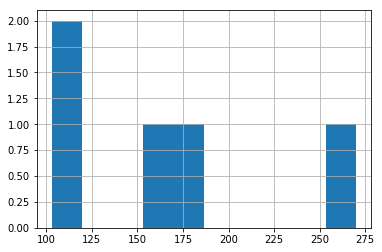

In [186]:
qtd_vitimas_de_acidente_bairro.hist()

In [117]:
acidentes_2014_2016["tipo de ocorrencia"].value_counts()[:5]

Colisão                 2763
Atropelamento            449
Moto e Ciclomotor        448
Motocicletas             179
Ciclistas e Pedestre     113
Name: tipo de ocorrencia, dtype: int64

In [118]:
acidentes_2014_2016[acidentes_2014_2016["tipo de ocorrencia"] == "Colisão"]["tipo"].value_counts()

Motocicleta     1547
Automóvel        158
Motocicletas     149
Ciclomotor        81
Automoveis        42
Outros            40
Automóveis        38
Ciclista          30
Pedestre          19
Name: tipo, dtype: int64

In [119]:
acidentes_2014_2016["detalhes"].value_counts()

Moto                   1073
Pedestre                252
Ciclomotor              141
Táxi                    114
Ciclista                 65
Ônibus                   36
Taxi                     17
Acidente com morte       12
Caminhão                 11
Onibus                    6
Acidente com animal       4
Carroça                   3
Name: detalhes, dtype: int64

## Infrações

In [11]:
infracoes_2014_2016.shape

(875049, 12)

In [120]:
infracoes_com_localizacao.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento',
       'numero_semaforo', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

In [125]:
infracoes_2014_2016.head(10)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,numero_semaforo
3,2014-01-02,2018-07-01 09:49:42,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5460,Estacionar o veículo onde houver guia de calça...,"Art. 181, Inc. IX","RUA JONATHAS DE VASCONCELOS, EM FRENTE AO N. 457",457
4,2014-01-01,2018-07-01 02:28:04,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3900",3900
5,2014-01-01,2018-07-01 09:30:12,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV BOA VIAGEM, LADO OPOSTO AO N. 4040",4040
7,2014-01-02,2018-07-01 10:17:15,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,6041,Executar operação de conversão à esquerda em l...,Art. 207,"AV GOVERNADOR AGAMENON MAGALHAES, SOB O SEMAF...",173
8,2014-01-02,2018-07-01 16:11:21,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA CORREDOR DO BISPO, EM FRENTE AO N. 66 SEN...",66
9,2014-01-02,2018-07-01 17:07:00,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 3256",3256
10,2014-01-02,2018-07-01 17:09:34,2014-01-03,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AV CONSELHEIRO AGUIAR, EM FRENTE AO N. 2350",2350
12,2014-01-03,2018-07-01 10:09:00,2014-01-06,Código 6 - AUTOS NO TALÃO MANUAL,5452,Estacionar o veículo ao lado ou sobre gramados...,"Art. 181, Inc. VIII",RUA DO JARDIM - OPOSTO AO N 12,12
26,2014-01-02,2018-07-01 13:21:53,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2233",2233
27,2014-01-02,2018-07-01 13:28:52,2014-01-07,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","RUA DOS NAVEGANTES, EM FRENTE AO N. 2083",2083


In [130]:
infracoes_2014_2016.datainfracao.dt.day_name().value_counts()

Sunday       160988
Wednesday    128123
Thursday     124478
Friday       123825
Tuesday      121264
Monday       119637
Saturday      96734
Name: datainfracao, dtype: int64

In [133]:
top_5_infracoes = infracoes_2014_2016.descricaoinfracao.value_counts().sort_values(ascending=False)[:5]

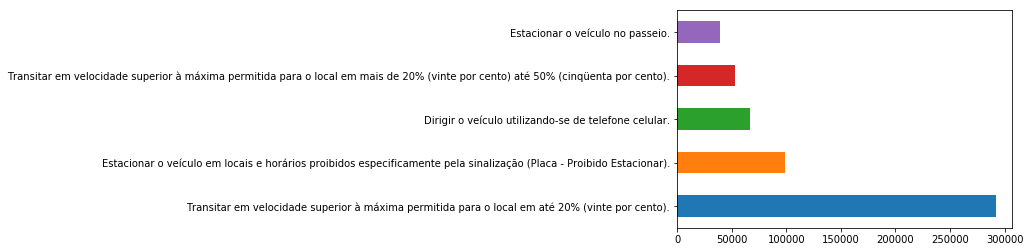

In [136]:
top_5_infracoes.plot.barh()

# A maioria das infrações são registradas no meio da manhã e no meio da tarde? PQ?
infracoes_com_localizacao.horainfracao.dt.hour.value_counts()[:5]

In [134]:
infracoes_2014_2016.dtypes

datainfracao         datetime64[ns]
horainfracao         datetime64[ns]
dataimplantacao              object
agenteequipamento            object
infracao                      int64
descricaoinfracao            object
amparolegal                  object
localcometimento             object
numero_semaforo               int64
Latitude                    float64
Longitude                   float64
geometry                     object
dtype: object

In [140]:
# No final da noite e de madrugada são os horários onde há menos notificações.
top_5_horas = infracoes_2014_2016.horainfracao.dt.hour.value_counts()[-10:]

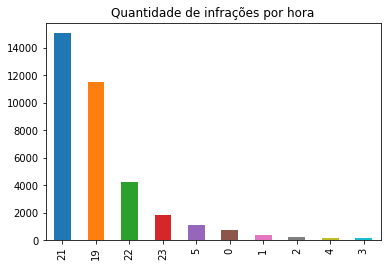

In [144]:
top_5_horas.plot.bar(title="Quantidade de infrações por hora")

In [145]:
# Não há uma mudança significativa na quantidade de multas durante a semana.
# Nos Finais de Semana há uma redução significativa
infracoes_by_weekday = infracoes_2014_2016.datainfracao.dt.weekday_name.value_counts()

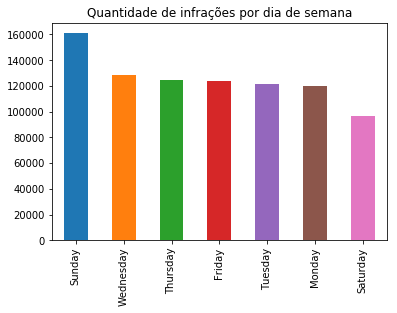

In [147]:
infracoes_by_weekday.plot.bar(title="Quantidade de infrações por dia de semana")

# Acidentes relacionados à equipamento de monitoramento

In [141]:
acidentes_2014_2016.groupby("monitoring_near_100m")["quantidade de vitimas"].value_counts()

monitoring_near_100m  quantidade de vitimas
False                 1                        2165
                      0                        1772
                      2                         294
                      3                          36
                      4                           6
                      5                           3
                      6                           1
                      7                           1
                      8                           1
                      9                           1
                      10                          1
                      15                          1
True                  1                          29
                      0                          21
                      2                           2
Name: quantidade de vitimas, dtype: int64

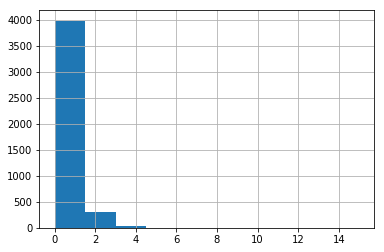

In [144]:
acidentes_2014_2016["quantidade de vitimas"].hist()

In [104]:
acidentes_2014_2016_monitoring_near_100m_true = acidentes_2014_2016[acidentes_2014_2016["monitoring_near_100m"] == True]

In [76]:
qtd_vitimas_de_acidente_bairro = acidentes_2014_2016.groupby("bairro")["quantidade de vitimas"].sum().sort_values(ascending=False)[:5]

In [75]:
qtd_vitimas_de_acidente_bairro_monitoring = acidentes_2014_2016_monitoring_near_100m_true.groupby("bairro")["quantidade de vitimas"].sum().sort_values(ascending=False)[:5]

In [86]:
qtd_vitimas_de_acidente_bairro

bairro
BOA VIAGEM     270
IMBIRIBEIRA    185
SANTO AMARO    155
BOA VISTA      104
MADALENA       103
Name: quantidade de vitimas, dtype: int64

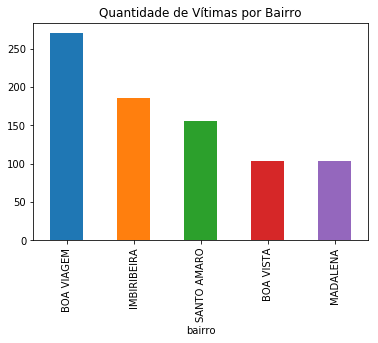

In [90]:
qtd_vitimas_de_acidente_bairro.plot.bar(title="Quantidade de Vítimas por Bairro")

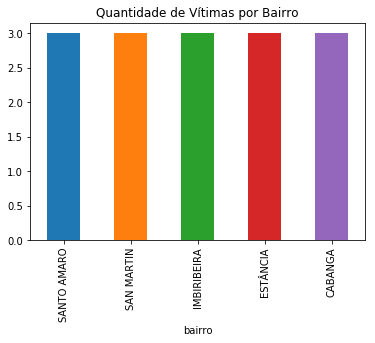

In [91]:
qtd_vitimas_de_acidente_bairro_monitoring.plot.bar(title="Quantidade de Vítimas por Bairro")

## *Achado*
A quantidade de acidentes com vítimas reduz drasticamente se houver um equipamento de monitoramento próximo ao acidente.

In [116]:
acidentes_2014_2016[acidentes_2014_2016["monitoring_near_500m"] == False].shape

(3785, 21)

In [115]:
acidentes_2014_2016[acidentes_2014_2016["monitoring_near_500m"] == True].shape

(549, 21)

In [99]:
acidentes_2014_2016_monitoring_near_100m_true.dtypes

bairro                      object
complemento                 object
data                        object
data de abertura            object
descricao                   object
detalhes                    object
endereco                    object
hora de abertura            object
latitude                   float64
longitude                  float64
quantidade de vitimas        int64
tipo                        object
tipo de ocorrencia          object
geometry                    object
numero_semaforo              int64
traffic_light_near_300m       bool
traffic_light_near_100m       bool
monitoring_near_100m          bool
monitoring_near_500m          bool
monitoring_near_1km           bool
monitoring_closest         float64
dtype: object

In [107]:
accidents_by_week_day = acidentes_2014_2016.data.dt.weekday_name.value_counts()

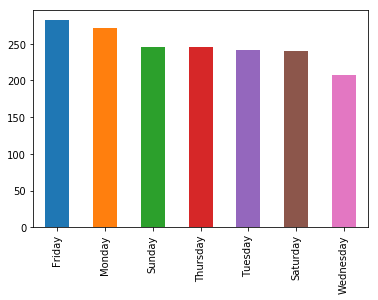

In [109]:
accidents_by_week_day.plot.bar()

In [108]:
accidents_by_week_day_monitoring_100m = acidentes_2014_2016_monitoring_near_100m_true.data.dt.weekday_name.value_counts()

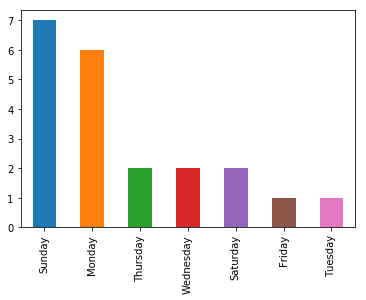

In [110]:
accidents_by_week_day_monitoring_100m.plot.bar()

In [74]:
qtd_vitimas_de_acidente_bairro

bairro
SANTO AMARO    3
SAN MARTIN     3
IMBIRIBEIRA    3
ESTÂNCIA       3
CABANGA        3
Name: quantidade de vitimas, dtype: int64

In [114]:
acidentes_2014_2016["quantidade de vitimas"].describe()

count    4334.000000
mean        0.689432
std         0.739255
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantidade de vitimas, dtype: float64

In [113]:
acidentes_2014_2016_monitoring_near_100m_true["quantidade de vitimas"].describe()

count    52.000000
mean      0.634615
std       0.561121
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: quantidade de vitimas, dtype: float64

In [151]:
acidentes_2014_2016_monitoring_500m_true["tipo de ocorrencia"].value_counts()

Colisão                 334
Moto e Ciclomotor        60
Atropelamento            54
Motocicletas             25
Ciclistas e Pedestre     19
COLISÃO COM CICLISTA     13
Automóveis e outros      12
CHOQUE                    9
Ciclistas                 5
TOMBAMENTO                3
Pedestres                 3
Automóveis                2
ACID. DE PERCURSO         2
Ciclomotores              2
CAPOTAMENTO               2
ATROPELAMENTO ANIMAL      1
COLISÃO                   1
ENTRADA E SAÍDA           1
FISCALIZAÇÃO              1
Name: tipo de ocorrencia, dtype: int64

In [152]:
acidentes_2014_2016["tipo de ocorrencia"].value_counts()

Colisão                 2763
Atropelamento            449
Moto e Ciclomotor        448
Motocicletas             179
Ciclistas e Pedestre     113
Automóveis e outros       85
COLISÃO COM CICLISTA      76
CHOQUE                    62
Ciclistas                 37
Pedestres                 30
Ciclomotores              23
CAPOTAMENTO               11
Automóveis                 9
TOMBAMENTO                 8
ACID. DE PERCURSO          8
ATROPELAMENTO ANIMAL       6
ENGAVETAMENTO              5
COLISÃO                    4
ENTRADA E SAÍDA            4
Outros                     3
ATROPELAMENTO              1
FISCALIZAÇÃO               1
QUEDA DE ÁRVORE            1
Name: tipo de ocorrencia, dtype: int64

## Achado
Não há correlação entre equipamento de monitoramento e tipo de acidente, o padrão acaba se mantendo.

## Equipamento de Monitoramento há 500m

In [118]:
acidentes_2014_2016_monitoring_500m_true = acidentes_2014_2016[acidentes_2014_2016["monitoring_near_500m"] == True]

# Relação entre quantidade de acidentes  x quantidade de infrações por dia do mês

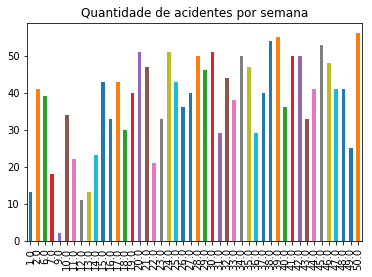

In [16]:
acidentes_2014_2016.data.dt.week.value_counts().sort_index().plot.bar(title="Quantidade de acidentes por semana")

In [12]:
infracoes_by_week = infracoes_2014_2016.datainfracao.dt.week.value_counts().sort_index()

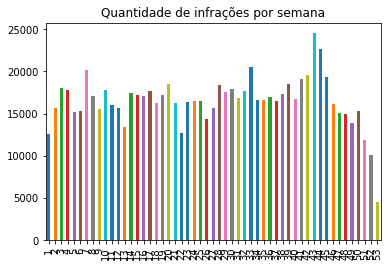

In [13]:
infracoes_by_week.plot.bar(title="Quantidade de infrações por semana")

# Relação entre quantidade de acidentes  x quantidade de infrações por dia da semana

# Visualização

In [17]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Circle, HoverTool, Triangle, Square
from bokeh.tile_providers import CARTODBPOSITRON, STAMEN_TERRAIN
import datashader
import datashader.glyphs
import datashader.transfer_functions as tf
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize

In [18]:
from geopandas import GeoDataFrame

In [19]:
crs = {'init': 'epsg:4326'}

In [20]:
acidentes_2014_2016["geometry"] = acidentes_2014_2016.apply(lambda example: Point(example.longitude, example.latitude), axis=1)

In [21]:
acidentes_2014_2016 = GeoDataFrame(acidentes_2014_2016, crs=crs)

In [40]:
monitoramento["geometry"] = monitoramento.apply(lambda example: Point(example.longitude, example.latitude), axis=1)

In [41]:
monitoramento = GeoDataFrame(monitoramento, crs=crs)

In [47]:
fiscalizacao["geometry"] = fiscalizacao.apply(lambda example: Point(example.LONGITUDE, example.LATITUDE), axis=1)

In [48]:
fiscalizacao = GeoDataFrame(fiscalizacao, crs=crs)

In [22]:
# map all dataframes to mercator
acidentes_2014_2016.crs = {'init': 'epsg:4326'}

In [23]:
infracoes_2014_2016.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento',
       'numero_semaforo', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

A projeção de lat lng utilizada pela CTTU parece conter um shift de alguns graus na longitude, então o lon0 
deve ser modificado. Pra isso, vou ter de criar uma transformção de projeção própria.

In [25]:
from pyproj import Proj, transform
inProj  = Proj("+init=EPSG:4326")
outProj = Proj("+init=EPSG:3857 +lon_0=0")

In [26]:
transform(inProj, outProj, -34.925988, -8.029113) # (lon, lat)

(-3887943.1996119837, -896736.561980885)

In [27]:
acidentes_2014_2016["new_geometry"] = acidentes_2014_2016["geometry"].apply(lambda point: Point(transform(inProj, outProj, point.y, point.x)))

In [28]:
acidentes_2014_2016[["latitude", "longitude"]].head(5)

,latitude,longitude
0,-8.029113,-34.925988
1,-8.020438,-34.903339
2,-8.034818,-34.949516
3,-8.011427,-34.924636
4,-8.016449,-34.941486


In [29]:
acidentes_2014_2016["geometry"].head(10)

0    POINT (-34.925988 -8.029113000000001)
1             POINT (-34.903339 -8.020438)
2             POINT (-34.949516 -8.034818)
3    POINT (-34.924636 -8.011427000000001)
4             POINT (-34.941486 -8.016449)
5             POINT (-34.895518 -8.115814)
6             POINT (-34.895561 -8.115803)
7             POINT (-34.932779 -8.069481)
8             POINT (-34.876217 -8.061715)
9             POINT (-34.886355 -8.021134)
Name: geometry, dtype: object

In [30]:
acidentes_2014_2016 = acidentes_2014_2016.to_crs({ "init": "epsg:3857"})

In [31]:
acidentes_2014_2016[["new_geometry","geometry", "latitude", "longitude"]].head(10)

,new_geometry,geometry,latitude,longitude
0,POINT (-893796.7706816518 -4153827.752040557),POINT (-3887943.199611984 -896736.561980885),-8.029113,-34.925988
1,POINT (-892831.0740990228 -4150753.046541867),POINT (-3885421.924465008 -895761.3155854029),-8.020438,-34.903339
2,POINT (-894431.8483766289 -4157022.68471501),POINT (-3890562.324591368 -897377.9313366576),-8.034818,-34.949516
3,POINT (-891827.9741674837 -4153644.188034234),POINT (-3887792.695660431 -894748.3179875035),-8.011427,-34.924636
4,POINT (-892387.0206502459 -4155932.165611471),POINT (-3889668.429080296 -895312.8778584789),-8.016449,-34.941486
5,POINT (-903448.2818529197 -4149691.506958309),POINT (-3884551.294727513 -906484.6655250423),-8.115814,-34.895518
6,POINT (-903447.0573385218 -4149697.34304588),POINT (-3884556.081465616 -906483.4286227496),-8.115803,-34.895561
7,POINT (-898290.5158859949 -4154749.826766496),POINT (-3888699.170273959 -901275.0203627406),-8.069481,-34.932779
8,POINT (-897426.0087204949 -4147072.226316389),POINT (-3882402.717235711 -900401.8761238728),-8.061715,-34.876217
9,POINT (-892908.5524646125 -4148447.94709005),POINT (-3883531.274233374 -895839.5593697376),-8.021134,-34.886355


In [49]:
monitoramento.crs = {'init': 'epsg:4326'}

In [53]:
fiscalizacao.crs = {'init': 'epsg:4326'}

## Display all data inside recife

In [55]:
p = figure(y_range=(-805000, -1025500), x_range=(-3950000, -3850000),
          x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON)
p.title.text = "Localização dos acidentes registrados pela CTTU entre 2014 e 2016"

#crashes

crash_source = ColumnDataSource(
    data=dict(
        lat=acidentes_2014_2016.geometry.y.tolist(),
        lon=acidentes_2014_2016.geometry.x.tolist(),
        descricao=acidentes_2014_2016.descricao.tolist()
    )
)

crash_circle = Circle(x="lon", y="lat", fill_alpha=0.5, line_color=None, fill_color="red", size=5)
crash_renderer = p.add_glyph(crash_source, crash_circle)

hover_crash = HoverTool(
    tooltips=[
        ("(lat,lng)", "(@lat, @lon)"),
        ("descricao", "@descricao"),
    ],
    renderers=[crash_renderer]
)

p.add_tools(hover_crash)

#monitoring

monitoring_source = ColumnDataSource(
    data=dict(
        lat=monitoramento.geometry.y.tolist(),
        lon=monitoramento.geometry.x.tolist(),
        name=monitoramento.nome.tolist()
    )
)



monitoring_circle = Square(x="lon", y="lat", fill_color="yellow", size=10)
monitoring_renderer = p.add_glyph(monitoring_source, monitoring_circle)

hover_monitoring = HoverTool(
    tooltips=[
        ("(lat,lng)", "(@lat, @lon)"),
        ("name", "@name"),
    ],
    renderers=[monitoring_renderer]
)

p.add_tools(hover_monitoring)

# fiscalizacao

fiscalizacao_source = ColumnDataSource(
    data=dict(
        lat=fiscalizacao.geometry.y.tolist(),
        lon=fiscalizacao.geometry.x.tolist(),
        equipamento=fiscalizacao.EQUIPAMENTO.tolist(),
        velocidade=fiscalizacao.VELOCIDADE.tolist()
    )
)

fiscalizacao_circle = Triangle(x="lon", y="lat", fill_color="black", size=10)
fiscalizacao_renderer = p.add_glyph(fiscalizacao_source, fiscalizacao_circle)

hover_fiscalizacao = HoverTool(
    tooltips=[
        ("(lat,lng)", "(@lat, @lon)"),
        ("equipamento", "@equipamento"),
        ("velocidade", "@velocidade")
    ],
    renderers=[fiscalizacao_renderer]
)

p.add_tools(hover_fiscalizacao)

#configuration

#output_notebook() #in order to plot inline
output_file("graph_sample.html") #in order to output in file
show(p)

INFO:bokeh.io.state:Session output file 'graph_sample.html' already exists, will be overwritten.


In [56]:
p = figure(y_range=(-805000, -1025500), x_range=(-3950000, -3850000),
          x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON)
p.title.text = "Localização das infrações com seus semáforos associados registrados pela CTTU entre 2014 e 2016"

#tickets

tickets = ColumnDataSource(
    data=dict(
        lat=infracoes_2014_2016.geometry.y.tolist(),
        lon=infracoes_2014_2016.geometry.x.tolist(),
        descricao=infracoes_2014_2016.descricaoinfracao.tolist()
    )
)

tickets_circle = Circle(x="lon", y="lat", fill_alpha=0.5, line_color=None, fill_color="red", size=5)
tickets_renderer = p.add_glyph(tickets, tickets_circle)

hover_tickets = HoverTool(
    tooltips=[
        ("(lat,lng)", "(@lat, @lon)"),
        ("descricao", "@descricao"),
    ],
    renderers=[tickets_renderer]
)

p.add_tools(hover_tickets)

#configuration

#output_notebook() #in order to plot inline
output_file("graph_sample.html") #in order to output in file
show(p)

AttributeError: 'Series' object has no attribute 'y'